In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

## Create a Simple Neural Network in Python

The best way to understand how neural networks work is to learn how to build one from scratch without using any library.

So, what is a Neural network?
The neural network is an algorithm inspired from the structure of the neurons inside a human brain. So, it is basically composed of neurons, connected together by synapses. If there is sufficient synaptic input to a neuron, then that neuron will  be activated. We call this process “thinking”.

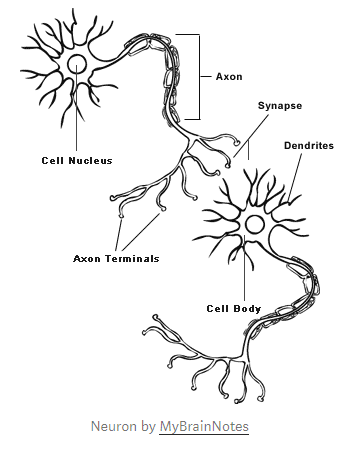

We can model this process by creating a neural network on a computer. The diagram below shows the architecture of a 2-layer Neural Network.


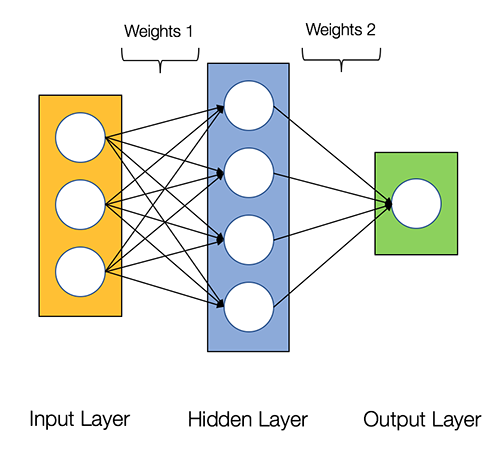

Neural Networks consist of the following components:
- An input layer, x
- An arbitrary amount of hidden layers (1 in exemple)
- An output layer, ŷ
- A set of weights and biases between each layer, W and b
- A choice of activation function for each hidden layer, σ. In this case, we will use a Sigmoid activation function.

We’re going to train the neural network to solve the problem below. The first four examples are called a training set. Can you work out the pattern? Should the answer be 0 or 1? Give an explanation of your answer.

| Input | Output   |
|------|------|
|   0 0 1  | 0|
|   1 1 1  | 1|
|   1 0 1  | 1|
|   0 1 1  | 0|
|   1 0 0  | ?|

In [ ]:
1

In order to teach our neuron we will give each input a weight, which can be a positive or negative number. An input with a large positive weight or a large negative weight, will have a strong effect on the neuron’s output. Before we start, we set each weight to a random number. Then we begin the training process:

1. Take the inputs from a training set example, adjust them by the weights, and pass them through a special formula to calculate the neuron’s output. Also known as $\textbf{feedforward}$.
2. Calculate the error, which is the difference between the neuron’s output and the desired output in the training set example. This is called the $\textbf{loss function}$.
3. Depending on the direction of the error, adjust the weights slightly. Also known as $\textbf{backpropagation}$.
4. Repeat this process a fixed number of iteration times.

Let's start with the first point: 
- Take the weighted sum of the neuron’s inputs, which is:
$weight_1 \cdot input_1 + weight_2 \cdot input_2 + weight_3 \cdot input_3 = \sum weight_i \cdot input_i  $. (1)

Next we normalise this, so the result is between 0 and 1. In order to do this, we will use a mathematically convenient function, called the Sigmoid function which is an normalization function shaped as a S. This function can map any value to a value from 0 to 1. It will assist us to normalize the weighted sum of the inputs.

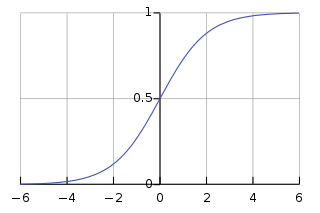

It's mathematical formulation is : $\frac{1}{1+e^{-x}}$. (2)

So by substituting the first equation into the second, the final formula for the output of the neuron is:

Output of neuron $= \frac{1}{1+e^{-\sum weight_i \cdot input_i}}$

You now have all the information to write the code for the first step

Represent the training set shown earlier and the numbers should be stored like:
$
\begin{bmatrix}
 0  &0  &1 \\ 
 1  &1  &1 \\ 
 1  &0  &1 \\ 
 0  &1  &1 
\end{bmatrix}\begin{bmatrix}
0\\ 
1\\ 
1\\ 
0
\end{bmatrix}$

### Initialization

In [9]:
from numpy import exp, array, random, dot

training_set_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
training_set_outputs = array([[0, 1, 1, 0]]).T

Define the function initializing the initial random weights:

In [50]:
def __init__weights():
        # Seed the random number generator, so it generates the same numbers
        # every time the program runs.
        random.seed(1)

        # We model a single neuron, with 3 input connections and 1 output connection.
        # We assign random weights to a 3 x 1 matrix, with values in the range -1 to 1
        # and mean 0.
        weights = 2 * random.random((3, 1)) - 1
        return weights 

### Feedforward

Define the function of the sigmoid:

In [11]:
# The Sigmoid function, which describes an S shaped curve.
# We pass the weighted sum of the inputs through this function to
# normalise them between 0 and 1.
def __sigmoid(x):
    return 1 / (1 + exp(-x))

Define the function calculating the output of the neuron:


In [31]:
def think(inputs, synaptic_weights):
        # Pass inputs through our neural network (our single neuron).
        feedforward = __sigmoid(dot(inputs, synaptic_weights))
        return feedforward

### Loss function

Now that we coded the elements necessary for the first step let's go to the second step, the loss function. In the case of this very simple neural network, the error is simply the difference between the desired output and the predicted output: 

In [14]:
# code line for calculating the error
error = training_set_outputs - output

### Backpropagation

3. Adjusting the weights

During the training cycle, we adjust the weights. Now that we’ve measured the error of our prediction (loss), we need to find a way to propagate the error back, and to update our weights and biases. But how much do we adjust the weights by? 

In order to know the appropriate amount to adjust the weights and biases by, we need to know the derivative of the loss function with respect to the weights and biases.

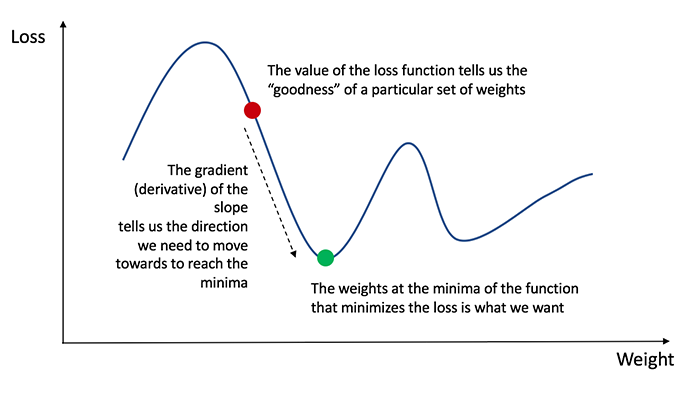

The calculus is based on the gradient of the Sigmoid curve. To understand this lets look at the previous figure.

We used the sigmoid curve to calculate the output of the neuron. If the output is a large positive or negative number, it signifies the neuron was quite confident one way or another. If the neuron is confident that the existing weight is correct, it doesn’t want to adjust it very much. Multiplying by the sigmoid curve gradient achieves this.

The gradient of the sigmoid curve, can be found by taking the derivative of the sigmoid function:

SigmoidGradient = $output \cdot (1-output)$

In [15]:
def __sigmoid_derivative(x):
        return x * (1 - x)

Next we want to make the adjustment proportional to the size of the error and decide if the weights should be adjusted or not according to the inputs.

Given the final formula for updating the weights:

Weights adjustement = $ error \cdot input \cdot output \cdot (1-output)$

Write here the function permitting to train the neuron according to the process we just described:

In [32]:
# Adjusting the synaptic weights each time.
def train(training_set_inputs, training_set_outputs, synaptic_weights, number_of_training_iterations):
    for iteration in range(number_of_training_iterations):
        # Pass the training set through our neural network (a single neuron).
        output = think(training_set_inputs, synaptic_weights)

        # Calculate the error (The difference between the desired output
        # and the predicted output).
        error = training_set_outputs - output

        # Multiply the error by the input and again by the gradient of the Sigmoid curve.
        # This means less confident weights are adjusted more.
        # This means inputs, which are zero, do not cause changes to the weights.
        adjustment = dot(training_set_inputs.T, error * __sigmoid_derivative(output))

        # Adjust the weights.
        synaptic_weights += adjustment
        return synaptic_weights

Now that we have seen all the steps separately put them all together and write a program doing the following points:
- use the exemple to train the neural network over 10000 iterations.
- print the random starting synaptic weights.
- print the new synaptic weights after training.
- what would be the prediction for the 1,0,0 exemple?

In [51]:
__init__weights()

array([[-0.16595599],
       [ 0.44064899],
       [-0.99977125]])

In [52]:
# The training set. We have 4 examples, each consisting of 3 input values
# and 1 output value.
training_set_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
training_set_outputs = array([[0, 1, 1, 0]]).T

In [53]:
# Train the neural network using a training set.
# Do it 10,000 times and make small adjustments each time.
synaptic_weights = train(training_set_inputs, training_set_outputs, __init__weights(), 10000)

In [54]:
print("New synaptic weights after training: ")
print(synaptic_weights)

New synaptic weights after training: 
[[ 0.12025406]
 [ 0.50456196]
 [-0.85063774]]


In [55]:
# Test the neural network with a new situation.
print("Considering new situation [1, 0, 0] -> ?: ")
print(think(array([1, 0, 0]),synaptic_weights))

Considering new situation [1, 0, 0] -> ?: 
[0.53002734]


In [1]:

from numpy import exp, array, random, dot


class NeuralNetwork():
    def __init__(self):
        # Seed the random number generator, so it generates the same numbers
        # every time the program runs.
        random.seed(1)

        # We model a single neuron, with 3 input connections and 1 output connection.
        # We assign random weights to a 3 x 1 matrix, with values in the range -1 to 1
        # and mean 0.
        self.synaptic_weights = 2 * random.random((3, 1)) - 1

    # The Sigmoid function, which describes an S shaped curve.
    # We pass the weighted sum of the inputs through this function to
    # normalise them between 0 and 1.
    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))

    # The derivative of the Sigmoid function.
    # This is the gradient of the Sigmoid curve.
    # It indicates how confident we are about the existing weight.
    def __sigmoid_derivative(self, x):
        return x * (1 - x)

    # We train the neural network through a process of trial and error.
    # Adjusting the synaptic weights each time.
    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
        for iteration in range(number_of_training_iterations):
            # Pass the training set through our neural network (a single neuron).
            output = self.think(training_set_inputs)

            # Calculate the error (The difference between the desired output
            # and the predicted output).
            error = training_set_outputs - output

            # Multiply the error by the input and again by the gradient of the Sigmoid curve.
            # This means less confident weights are adjusted more.
            # This means inputs, which are zero, do not cause changes to the weights.
            adjustment = dot(training_set_inputs.T, error * self.__sigmoid_derivative(output))

            # Adjust the weights.
            self.synaptic_weights += adjustment

    # The neural network thinks.
    def think(self, inputs):
        # Pass inputs through our neural network (our single neuron).
        return self.__sigmoid(dot(inputs, self.synaptic_weights))


if __name__ == "__main__":

    #Intialise a single neuron neural network.
    neural_network = NeuralNetwork()

    print(neural_network.synaptic_weights)

    # The training set. We have 4 examples, each consisting of 3 input values
    # and 1 output value.
    training_set_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
    training_set_outputs = array([[0, 1, 1, 0]]).T

    # Train the neural network using a training set.
    # Do it 10,000 times and make small adjustments each time.
    neural_network.train(training_set_inputs, training_set_outputs, 10000)

    print("New synaptic weights after training: ")
    print(neural_network.synaptic_weights)

    # Test the neural network with a new situation.
    print("Considering new situation [1, 0, 0] -> ?: ")
    print(neural_network.think(array([1, 0, 0])))

[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
New synaptic weights after training: 
[[ 9.67299303]
 [-0.2078435 ]
 [-4.62963669]]
Considering new situation [1, 0, 0] -> ?: 
[0.99993704]
